In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import pandas as pd
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches

page = '/Users/muthukrishnan/Documents/Mind Power Study Techniques - Raj Bapna.jpg'
gray_img = rgb2gray(imread(page))

#binarize the image
binary_imag = np.ones(gray_img.shape)
r,c = gray_img.shape
divider = 2
for ri in range(divider):
    for ci in range(divider):
        region = gray_img[int((ri/divider)*r):int((ri/divider+1/divider)*r), int((ci/divider)*c):int((ci/divider+1/divider)*c)]
        thresh = threshold_otsu(region)
        binary_imag[int((ri/divider)*r):int((ri/divider+1/divider)*r), int((ci/divider)*c):int((ci/divider+1/divider)*c)] = region < thresh
    
fig, ax = plt.subplots(ncols=2, figsize=(20,20))

ax[0].axis("off")
ax[0].imshow(gray_img, cmap="gray")
ax[1].axis("off")
ax[1].imshow(binary_imag, cmap="gray")
plt.show()

<Figure size 2000x2000 with 2 Axes>

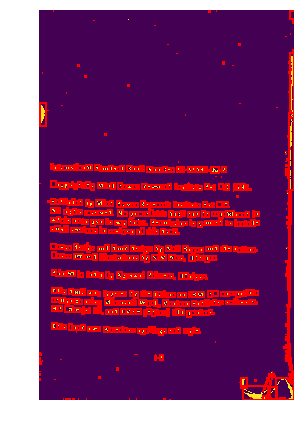

In [28]:
label_image = label(binary_imag)
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(binary_imag)
for region in regionprops(label_image):
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
ax.set_axis_off()
plt.tight_layout()
plt.show()

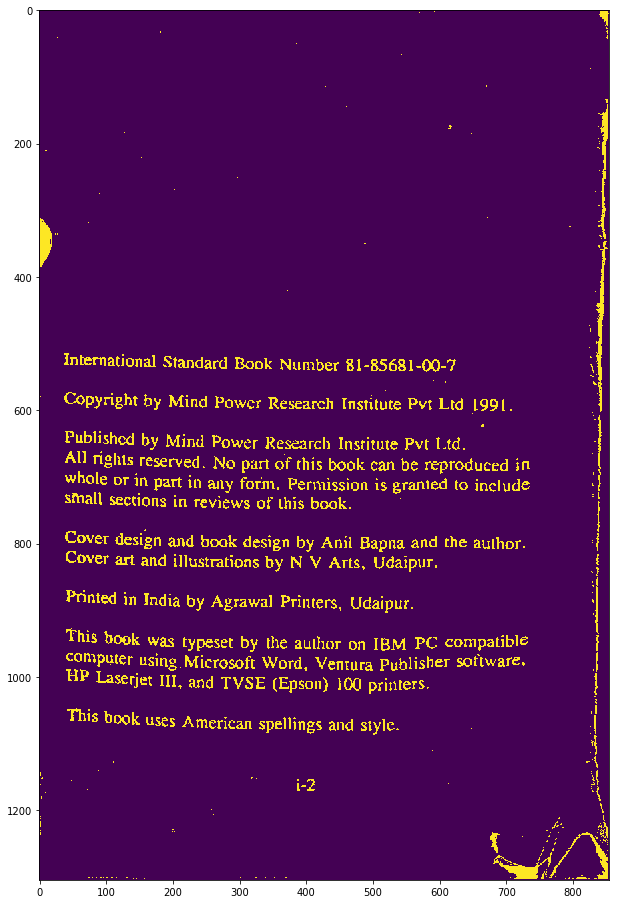

In [24]:
# lets remove all the outliers 
def is_a_child(root_region, child_region):
    rminr, rminc, rmaxr, rmaxc = root_region.bbox
    minr, minc, maxr, maxc = child_region.bbox
    if minr > rminr and minc > rminc and maxr < rmaxr and maxc < rmaxc:
        return True
    return False

cleaned_img = np.copy(binary_imag)
region_props = regionprops(label_image)

# ignore too small areas
for region in region_props:
    minr, minc, maxr, maxc = region.bbox
    height = maxr - minr
    width = maxc - minc
    if region.area < 15 or region.extent < 0.05 or height/width < 0.06:
        for coord in region.coords:
            cleaned_img[coord[0],coord[1]] = True

# remove ccs which have more than 3 components within them
label_heirarchy = {}
for iindex, iregion  in enumerate(region_props[0:-1]):
    count = 0 
    for jindex, jregion in enumerate(region_props[1:]):
        if is_a_child(iregion, jregion):
            count += 1

    if count > 3:
        # clear the region
        for coord in iregion.coords:
            cleaned_img[coord[0],coord[1]] = True
            
            
fig, ax = plt.subplots(figsize=(20, 16))
ax.imshow(cleaned_img)
plt.show()

In [29]:
from scipy.spatial.distance import euclidean
label_image = label(cleaned_img)
region_distances = []
origin = [0, cleaned_img.shape[1] + 50]
regions_properties = regionprops(label_image)
for index, region in enumerate(regions_properties):
    minr, minc, maxr, maxc = region.bbox
    baseline = [maxr, maxc]
    x_dist_point = [0, maxc]
    y_dist_point = [maxr, 0]
    # angle_with_origin = np.arctan(maxr/(origin[1]-maxc))
    # euclidean(baseline,origin),
    region_distances.append([euclidean(baseline,x_dist_point), euclidean(baseline,y_dist_point), index, maxr, maxc])

In [31]:
# region_distances = np.array(region_distances)
# region_distances = region_distances[np.lexsort((region_distances[:,0]))]
df = pd.DataFrame(region_distances, columns = ["angle", "distance", "index", "maxr", "maxc"])
df = df.sort_values(["angle", "distance"], ascending = (True, True))
print(df)

      angle  distance  index  maxr  maxc
0       2.0      47.0      0     2    47
1       3.0     594.0      1     3   594
3       5.0     571.0      3     5   571
2      29.0     854.0      2    29   854
5      32.0     300.0      5    32   300
6      34.0     183.0      6    34   183
7      35.0     394.0      7    35   394
4      36.0     853.0      4    36   853
9      42.0      28.0      9    42    28
8      43.0     853.0      8    43   853
10     51.0     386.0     10    51   386
11     67.0     544.0     11    67   544
12     79.0     841.0     12    79   841
13     88.0     827.0     13    88   827
14     94.0     829.0     14    94   829
15    115.0     671.0     15   115   671
16    116.0     430.0     16   116   430
17    136.0     853.0     17   136   853
18    139.0     853.0     18   139   853
20    145.0     461.0     20   145   461
21    149.0     839.0     21   149   839
23    175.0     839.0     23   175   839
22    179.0     619.0     22   179   619
24    185.0     

In [45]:
#break into groups of same lines.
lines = []
start = 0
for index, point in enumerate(df.values):
    if index > 0 and point[4] < df.values[index-1][4]:
        lines.append(df.values[start:index])
        print(start, index)
        start = index

0 2
2 4
4 5
5 8
8 10
10 13
13 15
15 16
16 19
19 22
22 23
23 27
27 28
28 31
31 32
32 34
34 36
36 38
38 40
40 41
41 45
45 46
46 50
50 55
55 59
59 60
60 61
61 62
62 65
65 66
66 73
73 79
79 84
84 92
92 100
100 107
107 110
110 111
111 115
115 117
117 119
119 120
120 122
122 125
125 126
126 127
127 136
136 142
142 156
156 173
173 174
174 176
176 178
178 179
179 180
180 181
181 183
183 186
186 192
192 218
218 232
232 234
234 237
237 242
242 250
250 259
259 271
271 281
281 284
284 287
287 294
294 305
305 317
317 334
334 342
342 344
344 346
346 349
349 352
352 356
356 359
359 360
360 376
376 390
390 392
392 395
395 397
397 399
399 405
405 421
421 432
432 439
439 443
443 447
447 451
451 463
463 471
471 485
485 486
486 487
487 491
491 492
492 494
494 497
497 502
502 503
503 507
507 517
517 530
530 534
534 539
539 544
544 546
546 548
548 549
549 550
550 558
558 560
560 565
565 571
571 578
578 581
581 589
589 595
595 598
598 599
599 602
602 604
604 610
610 621
621 628
628 629
629 635
635 643
643 64

204

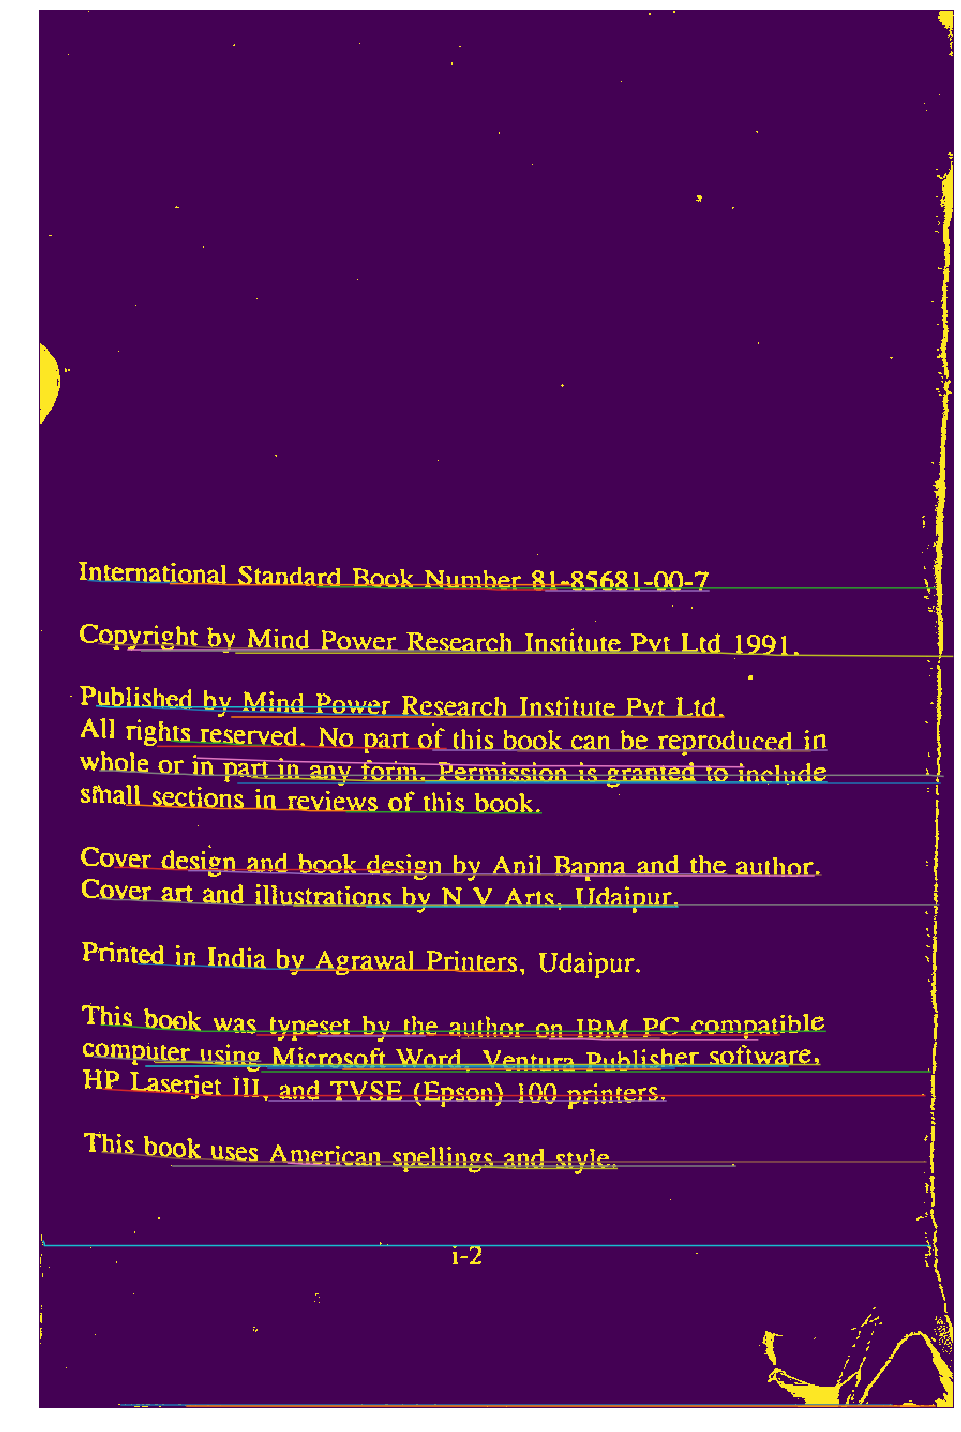

In [48]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(cleaned_img)
lines = np.array(lines)
for line in lines:
    if len(line) > 5:
        ax.plot(line[:,4], line[:,3])
ax.set_axis_off()
plt.tight_layout()
plt.show()